In [1]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv("T43.6_nationwide.txt",delimiter="\t")

We replace "Unreliable" by NaN.

In [3]:
data_frame=data_frame.replace("Unreliable",np.nan)

In [4]:
data_frame[data_frame["Gender"] == "Female"]

,Notes,Year,Year Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,NaN,2013.0,2013.0,Female,F,1106.0,160477237.0,0.7
3,NaN,2014.0,2014.0,Female,F,1278.0,161920569.0,0.8
6,NaN,2015.0,2015.0,Female,F,1745.0,163189523.0,1.1
9,NaN,2016.0,2016.0,Female,F,2194.0,164048590.0,1.3
12,NaN,2017.0,2017.0,Female,F,3093.0,165311059.0,1.9
15,NaN,2018.0,2018.0,Female,F,3775.0,166038755.0,2.3
18,NaN,2019.0,2019.0,Female,F,4734.0,166582199.0,2.8
21,NaN,2020.0,2020.0,Female,F,6890.0,167227921.0,4.1


In [5]:
CF2 = data_frame[(data_frame["Gender"] == "Female") & 
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CM2 = data_frame[(data_frame["Gender"] == "Male") & 
                (data_frame["Year"] != 2020.0)][["Year", "Crude Rate"]].astype(float) 
CF = data_frame[(data_frame["Gender"] == "Female")] [["Year", "Crude Rate"]].astype(float) 
CM = data_frame[(data_frame["Gender"] == "Male")][["Year", "Crude Rate"]].astype(float)
CF2_covid = data_frame[(data_frame["Gender"] == "Female") & 
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)
CM2_covid = data_frame[(data_frame["Gender"] == "Male") & 
                (data_frame["Year"] == 2020.0)][["Year", "Crude Rate"]].astype(float)

In [6]:
x1=CF2["Year"]
y1=CF2["Crude Rate"]
x1c=CF["Year"]

x2=CM2["Year"]
y2=CM2["Crude Rate"]
x2c=CM["Year"]

In [7]:
xr=CM2["Year"]
yr=CM2["Crude Rate"].div(CF2["Crude Rate"].values)

In [8]:
coeffF = np.polyfit(x1, y1, 2)
yfitF = np.polyval(coeffF,x1)
resF = np.sum((y1  - yfitF)**2)
coeffM = np.polyfit(x2, y2, 2)
yfitM = np.polyval(coeffM,x2)
resM = np.sum((y2  - yfitM)**2)

#stdF = np.sqrt(resF/5)
#stdM = np.sqrt(resM/5)

stdF = np.sqrt(resF/(len(y1)-3))
stdM = np.sqrt(resM/(len(y2)-3))

percent off male =  22    19.148936
Name: Crude Rate, dtype: float64
percent off female =  21    18.106996
Name: Crude Rate, dtype: float64


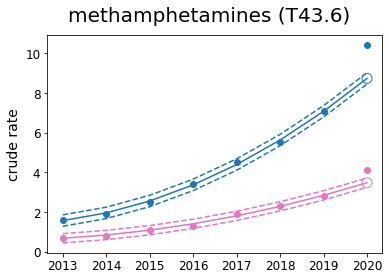

In [9]:
plt.plot(x1c, np.polyval(coeffM,x1c), color='tab:blue')
plt.scatter(x2,y2, color='tab:blue')
plt.scatter(2020.0, CM2_covid["Crude Rate"],color='tab:blue')
plt.scatter(2020.0, np.polyval(coeffM,2020), s=100, edgecolors='tab:blue', facecolors='none')

plt.plot(x1c, np.polyval(coeffF,x1c), color='tab:pink')
plt.scatter(x1,y1, color='tab:pink')
plt.scatter(2020.0, CF2_covid["Crude Rate"], color='tab:pink')
plt.scatter(2020.0, np.polyval(coeffF,2020), s=100, edgecolors='tab:pink', facecolors='none')

plt.plot(x2c, np.polyval(coeffF,x1c)+3*stdF, color='tab:pink' , linestyle='dashed')
plt.plot(x2c, np.polyval(coeffF,x1c)-3*stdF, color='tab:pink', linestyle='dashed')
plt.plot(x2c, np.polyval(coeffM,x1c)+3*stdM, color='tab:blue', linestyle='dashed')
plt.plot(x2c, np.polyval(coeffM,x1c)-3*stdM, color='tab:blue', linestyle='dashed')

print('percent off male = ',(CM2_covid["Crude Rate"]/np.polyval(coeffM,2020)-1)*100)
print('percent off female = ',(CF2_covid["Crude Rate"]/np.polyval(coeffF,2020)-1)*100)
plt.suptitle('methamphetamines (T43.6)', fontsize=20)
#plt.legend(["female", "male"],frameon=False, fontsize = 18)
plt.ylabel("crude rate", fontsize = 18)

#plt.yticks(np.arange(1.0, 5.1, 1.0))
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
#plt.xlabel("year", fontsize=14)
plt.ylabel("crude rate", fontsize=14)

plt.savefig('AttemptT43.6b_R.svg')